# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

# Load liberaries

In [ ]:
#import liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load data
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [ ]:
#size of data
df.shape

(9540, 10)

In [ ]:
#check for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [ ]:
# Count the number of missing values in each column
print(df.isnull().sum())


department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64


In [ ]:
# Print the total number of unique categories
dep_cat = len(df['department'].unique())
print('Number of departments = ', dep_cat)

# Count the number of employees that left'. 
left_in_cat = df['left'].value_counts()
left_in_cat

Number of departments =  10


no     6756
yes    2784
Name: left, dtype: int64

29.1% of employee left the campany.


In [ ]:
#get unique department names
dept_name = df['department'].unique().tolist()
dept_name
# there are 10 different departments

['operations',
 'support',
 'logistics',
 'sales',
 'IT',
 'admin',
 'engineering',
 'marketing',
 'finance',
 'retail']

In [ ]:

# Labeling and encoding
#convert salary to numeric value
# replacing values
df['left'].replace(['no', 'yes'],[0, 1], inplace=True)
df['salary'].replace(['low', 'medium','high'],[1, 2,3], inplace=True)


df.head(3)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,1,5.0,0.626759,0,180.866070,0
1,operations,0,0.751900,3,2,6.0,0.443679,0,182.708149,0
2,support,0,0.722548,3,2,6.0,0.446823,0,184.416084,0


#  check the statstics and correlation of each variable with "left".

In [ ]:
df.describe()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,2.017505,6.556184,0.504645,0.212055,184.661571,0.291824
std,0.171403,0.085307,0.579136,0.553849,1.415432,0.158555,0.408785,4.144831,0.454626
min,0.000000,0.310000,2.000000,1.000000,2.000000,0.000000,0.000000,171.374060,0.000000
25%,0.000000,0.592884,3.000000,2.000000,5.000000,0.386801,0.000000,181.472085,0.000000
50%,0.000000,0.647456,3.000000,2.000000,7.000000,0.500786,0.000000,184.628796,0.000000
75%,0.000000,0.708379,4.000000,2.000000,8.000000,0.622607,0.000000,187.728708,1.000000
max,1.000000,1.000000,5.000000,3.000000,12.000000,1.000000,1.000000,200.861656,1.000000


In [ ]:
df.corr()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,0.001879,0.010107,0.001039,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.001879,1.000000,0.000219,-0.003665,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.010107,0.000219,1.000000,-0.020884,0.022596,0.002714,0.002654,0.021299,-0.012408
salary,0.001039,-0.003665,-0.020884,1.000000,0.005097,-0.004510,-0.007137,0.007697,0.000943
tenure,0.001410,-0.184133,0.022596,0.005097,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.011704,-0.349778,0.002714,-0.004510,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001072,-0.003627,0.002654,-0.007137,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,-0.002190,-0.196096,0.021299,0.007697,0.978618,-0.143142,-0.000370,1.000000,0.009008
left,-0.036777,0.304294,-0.012408,0.000943,0.010521,-0.009721,-0.011485,0.009008,1.000000


Employes turnover  is positively correlated with the composite score the employee received in their last evaluation and negatively corilated with number of projects they envolve, bonus and tenure.

In [ ]:
df.groupby('left').mean()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,,
0,0.034340,0.635164,3.279455,2.017170,6.546625,0.505634,0.215068,184.637605
1,0.020474,0.692262,3.263649,2.018319,6.579382,0.502244,0.204741,184.719730


- The avarage review rate of those who stay is likely higher than emplyees who left.


# visualization

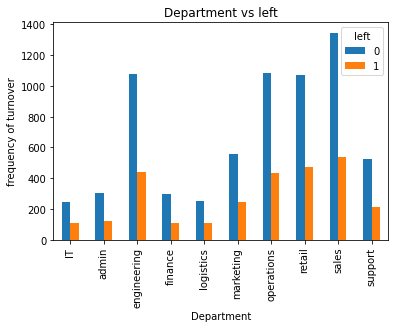

In [ ]:
pd.crosstab(df.department,df.left).plot(kind='bar')
plt.title("Department vs left")
plt.xlabel("Department")
plt.ylabel("frequency of turnover")
plt.show()

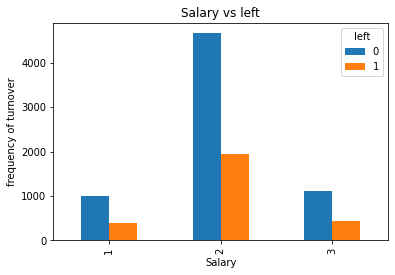

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title("Salary vs left")
plt.xlabel("Salary")
plt.ylabel("frequency of turnover")
plt.show()


In [ ]:
#pd.crosstab(df.review,df.left).plot(kind='bar')
#plt.title("review vs left")
#plt.xlabel("review")
#plt.ylabel("frequency of turnover")
#plt.show()

In [ ]:
#pd.crosstab(df.satisfaction,df.left).plot(kind='bar')
#plt.title("Satisfaction vs left")
#plt.xlabel("Satisfaction")
#plt.ylabel("frequency of turnover")
#plt.show()

In [ ]:
#pd.crosstab(df.avg_hrs_month,df.left).plot(kind='bar')
#plt.title("avg_hrs_month vs left")
#plt.xlabel("avg_hrs_month")
#plt.ylabel("frequency of turnover")
#plt.show()

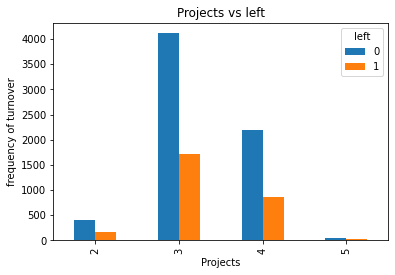

In [ ]:
pd.crosstab(df.projects,df.left).plot(kind='bar')
plt.title("Projects vs left")
plt.xlabel("Projects")
plt.ylabel("frequency of turnover")
plt.show()

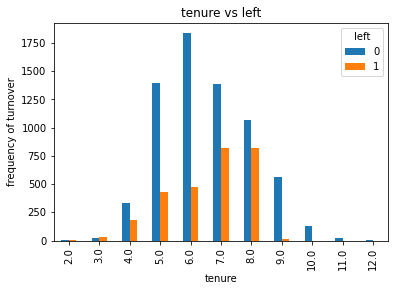

In [ ]:
pd.crosstab(df.tenure,df.left).plot(kind='bar')
plt.title("tenure vs left")
plt.xlabel("tenure")
plt.ylabel("frequency of turnover")
plt.show()

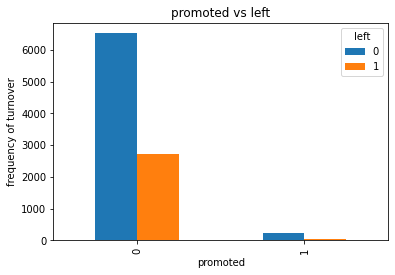

In [ ]:
pd.crosstab(df.promoted,df.left).plot(kind='bar')
plt.title("promoted vs left")
plt.xlabel("promoted")
plt.ylabel("frequency of turnover")
plt.show()

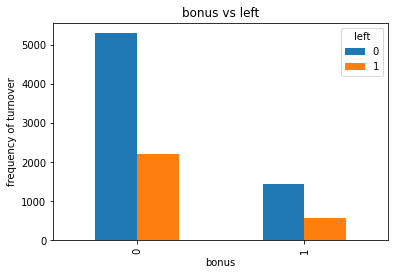

In [ ]:
pd.crosstab(df.bonus,df.left).plot(kind='bar')
plt.title("bonus vs left")
plt.xlabel("bonus")
plt.ylabel("frequency of turnover")
plt.show()

# Report

A) Data Exploration

Here are some observations from the above steps:

- The number of employees who left the company are 2784 and those who stay are 6756
- The average satisfaction level of employees who stayed in the company is higher than those employees who left.
- The average working monthly hours of employees who left the company is higher than those employees who stayed.
- The avarage salary of employes who left is higher than those who stay.
- Employes who engaged in projects are more likely stay with in campany than those who are not participated.
- Employees who were promoted in the last 24 monthes are more likely stay with campany.


In [ ]:
df1=df.copy()

In [ ]:
df1.groupby('salary').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
salary,,,,,,,,
1,0.028965,0.652816,3.304852,6.556119,0.504934,0.225199,184.657057,0.283128
2,0.030706,0.651663,3.271971,6.550446,0.505095,0.208894,184.637961,0.295114
3,0.029716,0.651642,3.260336,6.580749,0.502463,0.213824,184.766428,0.285530


- From the result above we can see that employees who earn medium salary are likely left than others.

In [ ]:
df1.groupby('department').mean()
#df.columns

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
department,,,,,,,,,
IT,0.022472,0.647746,3.289326,2.044944,6.609551,0.515818,0.221910,184.820946,0.308989
admin,0.037825,0.647086,3.278960,2.040189,6.498818,0.519444,0.186761,184.538120,0.281324
engineering,0.023087,0.650601,3.263852,2.020449,6.558047,0.504944,0.211082,184.691962,0.288259
finance,0.047264,0.654934,3.293532,2.029851,6.440299,0.497183,0.231343,184.375116,0.268657
logistics,0.019444,0.654374,3.275000,2.002778,6.527778,0.493084,0.208333,184.589924,0.308333
marketing,0.042394,0.657694,3.280549,1.995012,6.503741,0.502411,0.219451,184.469963,0.302993
operations,0.029566,0.653397,3.271353,2.012484,6.608410,0.504620,0.206965,184.812006,0.286465
retail,0.033744,0.650152,3.266061,2.012330,6.591175,0.502769,0.218689,184.735075,0.305646
sales,0.026553,0.651631,3.286245,2.011152,6.535847,0.504520,0.211896,184.616739,0.285183


- IT, Logistics,retail departments are the top three having highest turnover in ascending order.
- Finance department has lowest turnover rate.

B) Visualization

- The frequency of employee turnover depends  on the department they work for. Thus, department can be a good predictor of the outcome variable.
- Also, the frequency of employee turnover depends  on their salary, tunure, promotion, projects and bonus. 

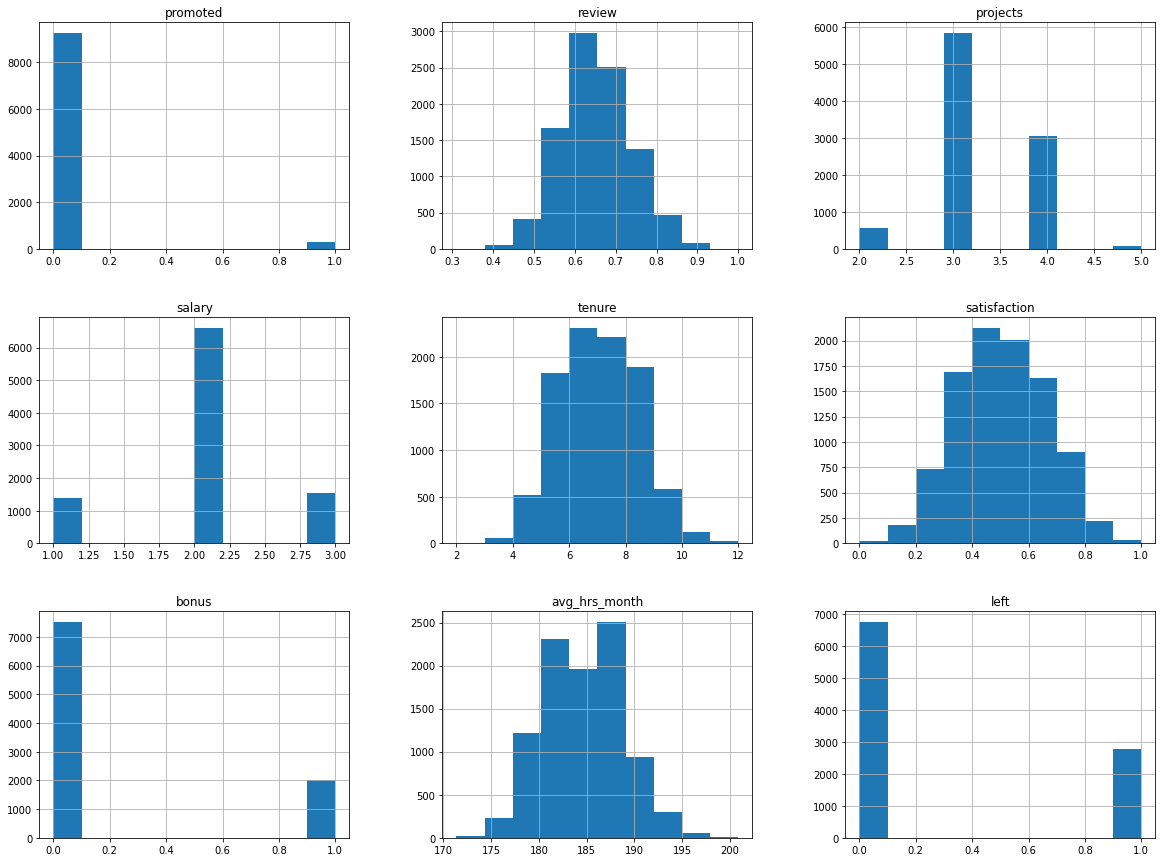

In [ ]:
#distribution of each variable
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("df_histogram_plots")
plt.show()

# Model and prediction

We need to predict employes turnover  and get variables which significant with great accuracy. 
So our our target is "left" variable and all others are predictors.
 We know that feature selection method help us to decide which variable is significate to predict the target variable.

In [ ]:
#encode department
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["dep_code"] = ord_enc.fit_transform(df[["department"]])
df1=df[["department", "dep_code"]]
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left', 'dep_code'],
      dtype='object')

In [ ]:
df.dep_code.unique().tolist()
df[["department", "dep_code"]].head()

,department,dep_code
0,operations,6.0
1,operations,6.0
2,support,9.0
3,logistics,4.0
4,sales,8.0


<AxesSubplot:ylabel='department'>

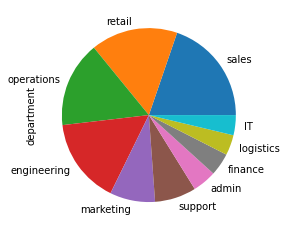

In [ ]:
df['department'].value_counts().plot(kind='pie')

In [ ]:
# Drop the 'department'  column
df.drop(['department'], axis='columns', inplace=True)
df.shape

(9540, 10)

In [ ]:
df_vars=df.columns.values.tolist()
y=['left']
X=[]
for i in df_vars:
    if i not in y:
        X.append(i)

In [ ]:
X

['promoted',
 'review',
 'projects',
 'salary',
 'tenure',
 'satisfaction',
 'bonus',
 'avg_hrs_month',
 'dep_code']

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. you can get more info about RFE https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 3)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False  True False False False]
[1 1 3 6 2 1 4 5 7]


RFE chose the 3 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. They are:

["promoted","review","satisfaction"]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0')])

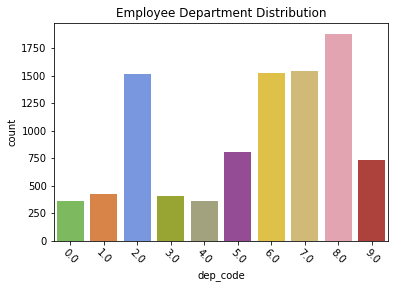

In [ ]:
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='dep_code', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

 ML models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# featurs
columns=['promoted','review','projects', 'salary', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month',  'dep_code'] 
x=df[columns]
y=df['left']

In [ ]:

#Split data into training and test samples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

 A) Logistic Regression 


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict(x_test))))

Logistic regression accuracy: 0.724


B) Random Forest Classifier


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))


Random Forest Accuracy: 0.853


C) SVM Classifier


In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support vector machine accuracy: 0.698


In [ ]:
for K in range(25):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  73.53249475890985 % for K-Value: 1
Accuracy is  74.1090146750524 % for K-Value: 2
Accuracy is  71.96016771488469 % for K-Value: 3
Accuracy is  74.21383647798741 % for K-Value: 4
Accuracy is  73.32285115303984 % for K-Value: 5
Accuracy is  74.58071278825996 % for K-Value: 6
Accuracy is  74.94758909853249 % for K-Value: 7
Accuracy is  74.58071278825996 % for K-Value: 8
Accuracy is  75.05241090146751 % for K-Value: 9
Accuracy is  75.05241090146751 % for K-Value: 10
Accuracy is  75.83857442348008 % for K-Value: 11
Accuracy is  75.26205450733752 % for K-Value: 12
Accuracy is  75.62893081761007 % for K-Value: 13
Accuracy is  75.68134171907757 % for K-Value: 14
Accuracy is  75.36687631027253 % for K-Value: 15
Accuracy is  75.57651991614256 % for K-Value: 16
Accuracy is  75.15723270440252 % for K-Value: 17
Accuracy is  75.68134171907757 % for K-Value: 18
Accuracy is  76.41509433962264 % for K-Value: 19
Accuracy is  75.52410901467506 % for K-Value: 20
Accuracy is  75.68134171907757

From the above models we can see that Random forest is better model. It performs 86%. However, we have to validate our result to decide wheather random forest is best predictive model for employees turnover. So I will apply Cross-validation to estimate how it is accurate predictive model and use in practice.

In [ ]:
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=0)
scoring = 'accuracy'

In [ ]:
# SVM
model_CVs = SVC()
results = model_selection.cross_val_score(model_CVs, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for SVM Classifier: 0.711


In [ ]:
# Random Forest
model_CVs = RandomForestClassifier()
results = model_selection.cross_val_score(model_CVs, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.874


In [ ]:
#KNN
model_CVs = KNeighborsClassifier()
results = model_selection.cross_val_score(model_CVs, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for KNeighbors Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for KNeighbors Classifier: 0.749


In [ ]:
#Logeistic Regression
model_CVs = LogisticRegression()
results = model_selection.cross_val_score(model_CVs, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for LogisticRegression Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for LogisticRegression Classifier: 0.731


 The cross validation scoer results remains  close to the KNN, Random Forest & SVM model accuracy. However, we need to evaluate the accuracy of the model using Precision and Recall.

# Precision and Recall
Next we see confusion matrix helps us to visualize predictions made by a classifier and evaluate its accuracy. The following question has to be raised:
 - When an employee left?
 

In [ ]:
#Precison Recall Scores for Random Forest
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1332
           1       0.80      0.68      0.74       576

    accuracy                           0.85      1908
   macro avg       0.84      0.80      0.82      1908
weighted avg       0.85      0.85      0.85      1908



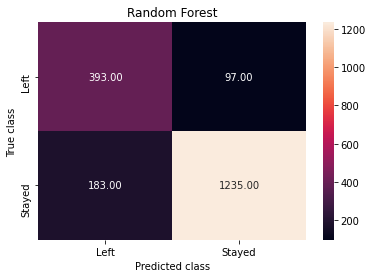

In [ ]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(x_test)
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [ ]:
398/576

0.6909722222222222

In [ ]:
#Precison Recall Scores for KNN
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1332
           1       0.67      0.34      0.45       576

    accuracy                           0.75      1908
   macro avg       0.72      0.63      0.64      1908
weighted avg       0.74      0.75      0.72      1908



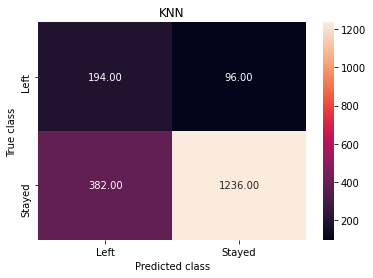

In [ ]:
#Confusion Matrix for KNN
y_pred = knn.predict(x_test)
knn_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNN')
plt.savefig('KNN')

In [ ]:
194/576

0.3368055555555556

In [ ]:
#Precison Recall Scores for Logistic Regression
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      1332
           1       0.68      0.16      0.26       576

    accuracy                           0.72      1908
   macro avg       0.70      0.56      0.54      1908
weighted avg       0.71      0.72      0.66      1908



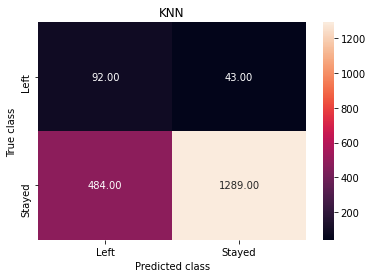

In [ ]:
#Confusion Matrix for Logistic Regression
y_pred = model.predict(x_test)
model_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(model_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNN')
plt.savefig('KNN')

In [ ]:
92/576

0.1597222222222222

In [ ]:
#Precison Recall Scores for SVM
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1332
           1       0.00      0.00      0.00       576

    accuracy                           0.70      1908
   macro avg       0.35      0.50      0.41      1908
weighted avg       0.49      0.70      0.57      1908



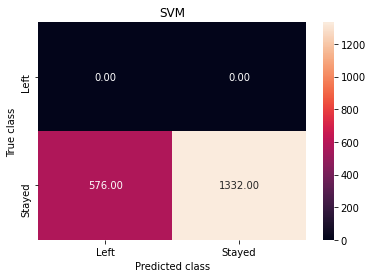

In [ ]:
#Confusion Matrix for Logistic Regression
y_pred = svc.predict(x_test)
svm_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(svm_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVM')
plt.savefig('SVM')

From all of the turnover cases, random forest correctly retrieved 398 out of 576. This translates to a turnover "recall" and "precision of about 69% (398/576), which is  better than KNN (33.6%), logistic regression (15.9%) and support vector machines (0%)

# ROC Curve

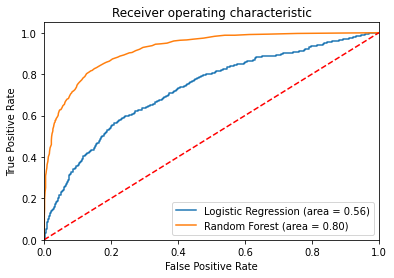

In [ ]:
#ROC for logistic regression
log_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_LR_RF')
plt.show()

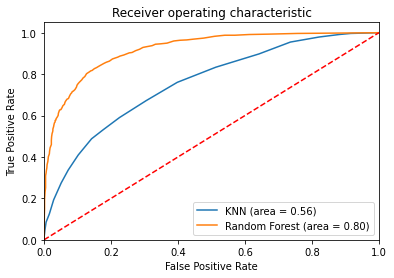

In [ ]:
#ROC for logistic regression
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % log_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_KNN_RF')
plt.show()

From the above ROC plots:the dotted line represents the ROC curve of a purely random classifier;  the model is definitely better than the no information reference point because it curves substantially above the diagonal line

So my observation: 
- Random forest is fair to pridict employees turnover.



# Next is to determine Variable Imporatnce for Random Forest Classifier

In [ ]:
feature=np.array(columns)
analysis_result=[]
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature[index], (importance[index] *100.0)))
    analysis_result += ('{}-{:.2f}%'.format(feature[index], (importance[index] *100.0)))

promoted-0.37%
bonus-1.27%
salary-1.96%
projects-2.01%
dep_code-4.88%
tenure-7.33%
review-25.76%
avg_hrs_month-26.83%
satisfaction-29.58%


We can see that random forest classifier predicts the most important factors. Here in descending order:

    - satisfaction
    - avg_hrs_month
    - review
    - department
    - projects
    - salary
    - bonus
    - promoted




# Conclusion and recommendation

- We can see that 29% of employees are left. 
- IT, Logistics,retail departments are the top three having highest turnover in ascending order and Finance department has lowest turnover rate. 
- Random forest classifier is best predictive model.

Based on my analysis I would recommend the following:
- Campany should assess its employees satisfaction and do some measure.
- Promotion length should be less than 24 months.
- Do not take seriously employees composite evaluation score to promot them or to allow them to participate in projects.
- Give appropriate bonus for all employees.

# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

# Load liberaries

In [ ]:
#import liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load data
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [ ]:
#size of data
df.shape

(9540, 10)

In [ ]:
#check for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [ ]:
# Count the number of missing values in each column
print(df.isnull().sum())


department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64


In [ ]:
# Print the total number of unique categories
dep_cat = len(df['department'].unique())
print('Number of departments = ', dep_cat)

# Count the number of employees that left'. 
left_in_cat = df['left'].value_counts()
left_in_cat

Number of departments =  10


no     6756
yes    2784
Name: left, dtype: int64

29.1% of employee left the campany.


In [ ]:
#get unique department names
dept_name = df['department'].unique().tolist()
dept_name
# there are 10 different departments

['operations',
 'support',
 'logistics',
 'sales',
 'IT',
 'admin',
 'engineering',
 'marketing',
 'finance',
 'retail']

In [ ]:

# Labeling and encoding
#convert salary to numeric value
# replacing values
df['left'].replace(['no', 'yes'],[0, 1], inplace=True)
df['salary'].replace(['low', 'medium','high'],[1, 2,3], inplace=True)


df.head(3)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,1,5.0,0.626759,0,180.866070,0
1,operations,0,0.751900,3,2,6.0,0.443679,0,182.708149,0
2,support,0,0.722548,3,2,6.0,0.446823,0,184.416084,0


#  check the statstics and correlation of each variable with "left".

In [ ]:
df.describe()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,2.017505,6.556184,0.504645,0.212055,184.661571,0.291824
std,0.171403,0.085307,0.579136,0.553849,1.415432,0.158555,0.408785,4.144831,0.454626
min,0.000000,0.310000,2.000000,1.000000,2.000000,0.000000,0.000000,171.374060,0.000000
25%,0.000000,0.592884,3.000000,2.000000,5.000000,0.386801,0.000000,181.472085,0.000000
50%,0.000000,0.647456,3.000000,2.000000,7.000000,0.500786,0.000000,184.628796,0.000000
75%,0.000000,0.708379,4.000000,2.000000,8.000000,0.622607,0.000000,187.728708,1.000000
max,1.000000,1.000000,5.000000,3.000000,12.000000,1.000000,1.000000,200.861656,1.000000


In [ ]:
df.corr()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,0.001879,0.010107,0.001039,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.001879,1.000000,0.000219,-0.003665,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.010107,0.000219,1.000000,-0.020884,0.022596,0.002714,0.002654,0.021299,-0.012408
salary,0.001039,-0.003665,-0.020884,1.000000,0.005097,-0.004510,-0.007137,0.007697,0.000943
tenure,0.001410,-0.184133,0.022596,0.005097,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.011704,-0.349778,0.002714,-0.004510,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001072,-0.003627,0.002654,-0.007137,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,-0.002190,-0.196096,0.021299,0.007697,0.978618,-0.143142,-0.000370,1.000000,0.009008
left,-0.036777,0.304294,-0.012408,0.000943,0.010521,-0.009721,-0.011485,0.009008,1.000000


Employes turnover  is positively correlated with the composite score the employee received in their last evaluation and negatively corilated with number of projects they envolve, bonus and tenure.

In [ ]:
df.groupby('left').mean()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,,
0,0.034340,0.635164,3.279455,2.017170,6.546625,0.505634,0.215068,184.637605
1,0.020474,0.692262,3.263649,2.018319,6.579382,0.502244,0.204741,184.719730


- The avarage review rate of those who stay is likely higher than emplyees who left.


# visualization

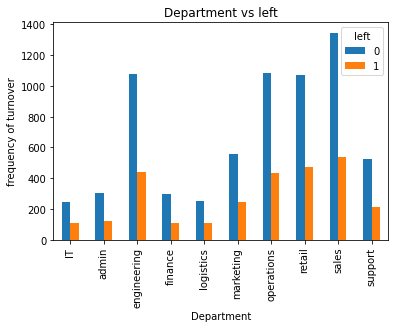

In [ ]:
pd.crosstab(df.department,df.left).plot(kind='bar')
plt.title("Department vs left")
plt.xlabel("Department")
plt.ylabel("frequency of turnover")
plt.show()

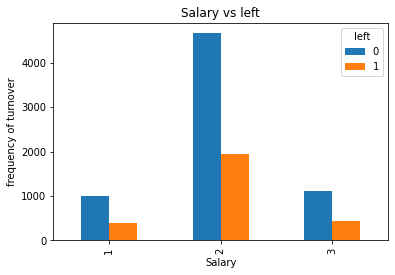

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title("Salary vs left")
plt.xlabel("Salary")
plt.ylabel("frequency of turnover")
plt.show()


In [ ]:
#pd.crosstab(df.review,df.left).plot(kind='bar')
#plt.title("review vs left")
#plt.xlabel("review")
#plt.ylabel("frequency of turnover")
#plt.show()

In [ ]:
#pd.crosstab(df.satisfaction,df.left).plot(kind='bar')
#plt.title("Satisfaction vs left")
#plt.xlabel("Satisfaction")
#plt.ylabel("frequency of turnover")
#plt.show()

In [ ]:
#pd.crosstab(df.avg_hrs_month,df.left).plot(kind='bar')
#plt.title("avg_hrs_month vs left")
#plt.xlabel("avg_hrs_month")
#plt.ylabel("frequency of turnover")
#plt.show()

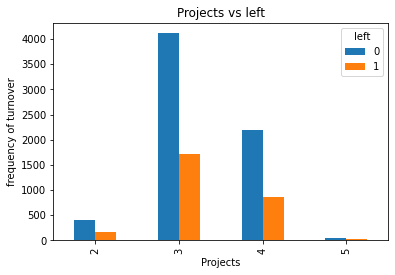

In [ ]:
pd.crosstab(df.projects,df.left).plot(kind='bar')
plt.title("Projects vs left")
plt.xlabel("Projects")
plt.ylabel("frequency of turnover")
plt.show()

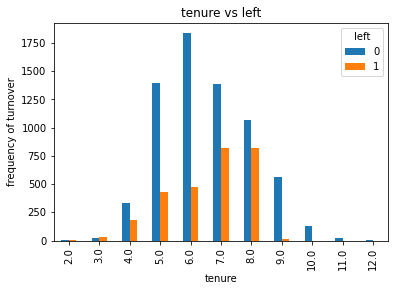

In [ ]:
pd.crosstab(df.tenure,df.left).plot(kind='bar')
plt.title("tenure vs left")
plt.xlabel("tenure")
plt.ylabel("frequency of turnover")
plt.show()

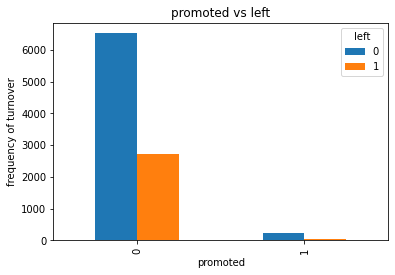

In [ ]:
pd.crosstab(df.promoted,df.left).plot(kind='bar')
plt.title("promoted vs left")
plt.xlabel("promoted")
plt.ylabel("frequency of turnover")
plt.show()

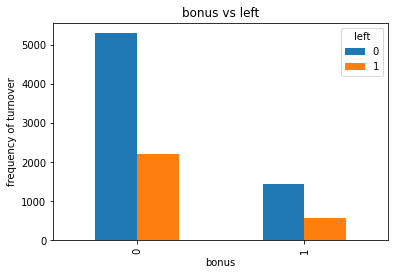

In [ ]:
pd.crosstab(df.bonus,df.left).plot(kind='bar')
plt.title("bonus vs left")
plt.xlabel("bonus")
plt.ylabel("frequency of turnover")
plt.show()

# Report

A) Data Exploration

Here are some observations from the above steps:

- The number of employees who left the company are 2784 and those who stay are 6756
- The average satisfaction level of employees who stayed in the company is higher than those employees who left.
- The average working monthly hours of employees who left the company is higher than those employees who stayed.
- The avarage salary of employes who left is higher than those who stay.
- Employes who engaged in projects are more likely stay with in campany than those who are not participated.
- Employees who were promoted in the last 24 monthes are more likely stay with campany.


In [ ]:
df1=df.copy()

In [ ]:
df1.groupby('salary').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
salary,,,,,,,,
1,0.028965,0.652816,3.304852,6.556119,0.504934,0.225199,184.657057,0.283128
2,0.030706,0.651663,3.271971,6.550446,0.505095,0.208894,184.637961,0.295114
3,0.029716,0.651642,3.260336,6.580749,0.502463,0.213824,184.766428,0.285530


- From the result above we can see that employees who earn medium salary are likely left than others.

In [ ]:
df1.groupby('department').mean()
#df.columns

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
department,,,,,,,,,
IT,0.022472,0.647746,3.289326,2.044944,6.609551,0.515818,0.221910,184.820946,0.308989
admin,0.037825,0.647086,3.278960,2.040189,6.498818,0.519444,0.186761,184.538120,0.281324
engineering,0.023087,0.650601,3.263852,2.020449,6.558047,0.504944,0.211082,184.691962,0.288259
finance,0.047264,0.654934,3.293532,2.029851,6.440299,0.497183,0.231343,184.375116,0.268657
logistics,0.019444,0.654374,3.275000,2.002778,6.527778,0.493084,0.208333,184.589924,0.308333
marketing,0.042394,0.657694,3.280549,1.995012,6.503741,0.502411,0.219451,184.469963,0.302993
operations,0.029566,0.653397,3.271353,2.012484,6.608410,0.504620,0.206965,184.812006,0.286465
retail,0.033744,0.650152,3.266061,2.012330,6.591175,0.502769,0.218689,184.735075,0.305646
sales,0.026553,0.651631,3.286245,2.011152,6.535847,0.504520,0.211896,184.616739,0.285183


- IT, Logistics,retail departments are the top three having highest turnover in ascending order.
- Finance department has lowest turnover rate.

B) Visualization

- The frequency of employee turnover depends  on the department they work for. Thus, department can be a good predictor of the outcome variable.
- Also, the frequency of employee turnover depends  on their salary, tunure, promotion, projects and bonus. 

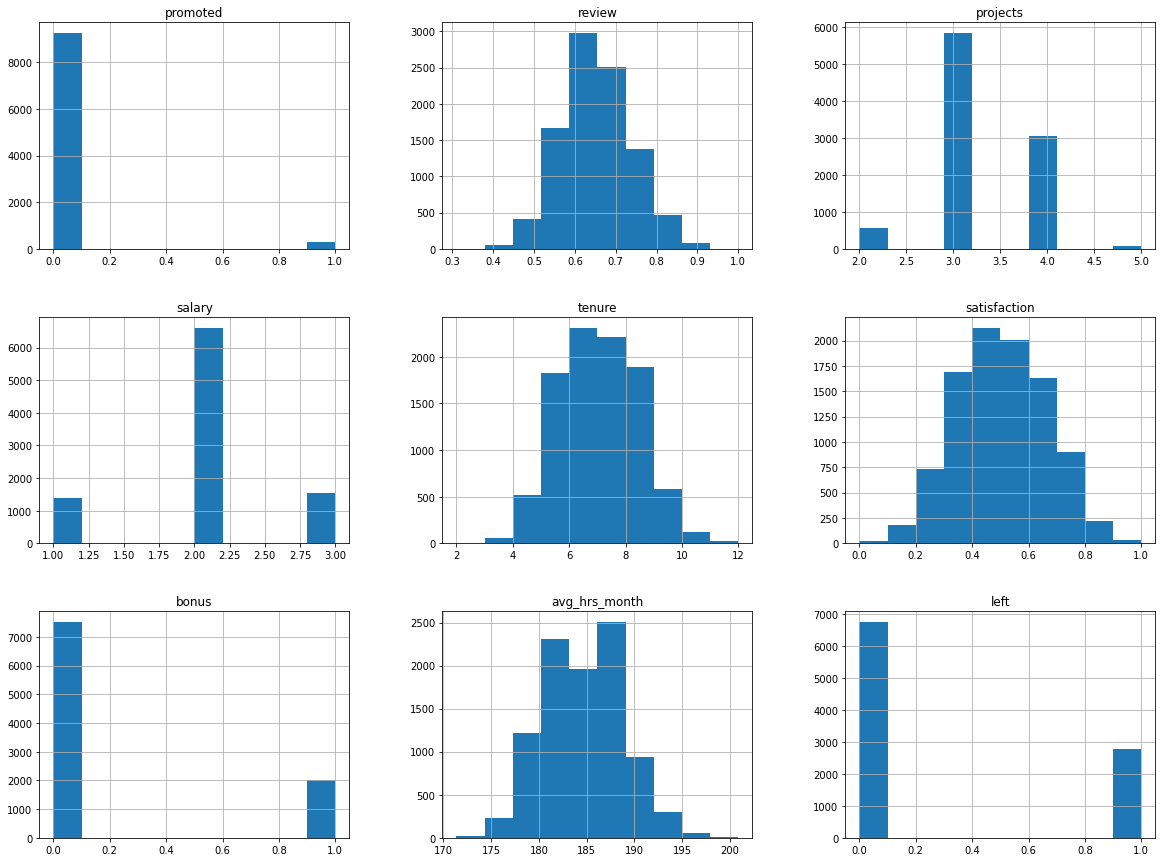

In [ ]:
#distribution of each variable
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("df_histogram_plots")
plt.show()

# Model and prediction

We need to predict employes turnover  and get variables which significant with great accuracy. 
So our our target is "left" variable and all others are predictors.
 We know that feature selection method help us to decide which variable is significate to predict the target variable.

In [ ]:
#encode department
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["dep_code"] = ord_enc.fit_transform(df[["department"]])
df1=df[["department", "dep_code"]]
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left', 'dep_code'],
      dtype='object')

In [ ]:
df.dep_code.unique().tolist()
df[["department", "dep_code"]].head()

,department,dep_code
0,operations,6.0
1,operations,6.0
2,support,9.0
3,logistics,4.0
4,sales,8.0


<AxesSubplot:ylabel='department'>

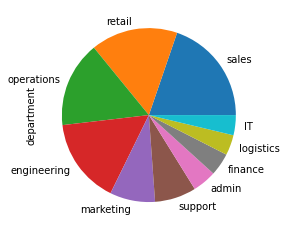

In [ ]:
df['department'].value_counts().plot(kind='pie')

In [ ]:
# Drop the 'department'  column
df.drop(['department'], axis='columns', inplace=True)
df.shape

(9540, 10)

In [ ]:
df_vars=df.columns.values.tolist()
y=['left']
X=[]
for i in df_vars:
    if i not in y:
        X.append(i)

In [ ]:
X

['promoted',
 'review',
 'projects',
 'salary',
 'tenure',
 'satisfaction',
 'bonus',
 'avg_hrs_month',
 'dep_code']

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. you can get more info about RFE https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 3)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False  True False False False]
[1 1 3 6 2 1 4 5 7]


RFE chose the 3 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. They are:

["promoted","review","satisfaction"]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0')])

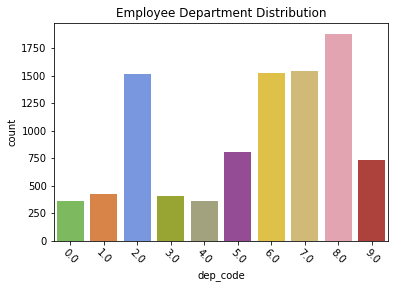

In [ ]:
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='dep_code', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

 ML models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# featurs
columns=['promoted','review','projects', 'salary', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month',  'dep_code'] 
x=df[columns]
y=df['left']

In [ ]:

#Split data into training and test samples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

 A) Logistic Regression 


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict(x_test))))

Logistic regression accuracy: 0.724


B) Random Forest Classifier


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))


Random Forest Accuracy: 0.853


C) SVM Classifier


In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support vector machine accuracy: 0.698


In [ ]:
for K in range(25):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  73.53249475890985 % for K-Value: 1
Accuracy is  74.1090146750524 % for K-Value: 2
Accuracy is  71.96016771488469 % for K-Value: 3
Accuracy is  74.21383647798741 % for K-Value: 4
Accuracy is  73.32285115303984 % for K-Value: 5
Accuracy is  74.58071278825996 % for K-Value: 6
Accuracy is  74.94758909853249 % for K-Value: 7
Accuracy is  74.58071278825996 % for K-Value: 8
Accuracy is  75.05241090146751 % for K-Value: 9
Accuracy is  75.05241090146751 % for K-Value: 10
Accuracy is  75.83857442348008 % for K-Value: 11
Accuracy is  75.26205450733752 % for K-Value: 12
Accuracy is  75.62893081761007 % for K-Value: 13
Accuracy is  75.68134171907757 % for K-Value: 14
Accuracy is  75.36687631027253 % for K-Value: 15
Accuracy is  75.57651991614256 % for K-Value: 16
Accuracy is  75.15723270440252 % for K-Value: 17
Accuracy is  75.68134171907757 % for K-Value: 18
Accuracy is  76.41509433962264 % for K-Value: 19
Accuracy is  75.52410901467506 % for K-Value: 20
Accuracy is  75.68134171907757

From the above models we can see that Random forest is better model. It performs 86%. However, we have to validate our result to decide wheather random forest is best predictive model for employees turnover. So I will apply Cross-validation to estimate how it is accurate predictive model and use in practice.

In [ ]:
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=0)
scoring = 'accuracy'

In [ ]:
# SVM
model_CVs = SVC()
results = model_selection.cross_val_score(model_CVs, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for SVM Classifier: 0.711


In [ ]:
# Random Forest
model_CVs = RandomForestClassifier()
results = model_selection.cross_val_score(model_CVs, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.874


In [ ]:
#KNN
model_CVs = KNeighborsClassifier()
results = model_selection.cross_val_score(model_CVs, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for KNeighbors Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for KNeighbors Classifier: 0.749


In [ ]:
#Logeistic Regression
model_CVs = LogisticRegression()
results = model_selection.cross_val_score(model_CVs, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for LogisticRegression Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for LogisticRegression Classifier: 0.731


 The cross validation scoer results remains  close to the KNN, Random Forest & SVM model accuracy. However, we need to evaluate the accuracy of the model using Precision and Recall.

# Precision and Recall
Next we see confusion matrix helps us to visualize predictions made by a classifier and evaluate its accuracy. The following question has to be raised:
 - When an employee left?
 

In [ ]:
#Precison Recall Scores for Random Forest
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1332
           1       0.80      0.68      0.74       576

    accuracy                           0.85      1908
   macro avg       0.84      0.80      0.82      1908
weighted avg       0.85      0.85      0.85      1908



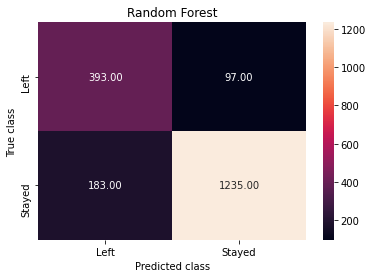

In [ ]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(x_test)
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [ ]:
398/576

0.6909722222222222

In [ ]:
#Precison Recall Scores for KNN
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1332
           1       0.67      0.34      0.45       576

    accuracy                           0.75      1908
   macro avg       0.72      0.63      0.64      1908
weighted avg       0.74      0.75      0.72      1908



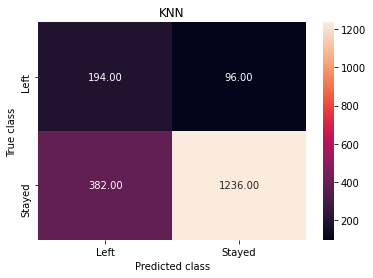

In [ ]:
#Confusion Matrix for KNN
y_pred = knn.predict(x_test)
knn_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNN')
plt.savefig('KNN')

In [ ]:
194/576

0.3368055555555556

In [ ]:
#Precison Recall Scores for Logistic Regression
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      1332
           1       0.68      0.16      0.26       576

    accuracy                           0.72      1908
   macro avg       0.70      0.56      0.54      1908
weighted avg       0.71      0.72      0.66      1908



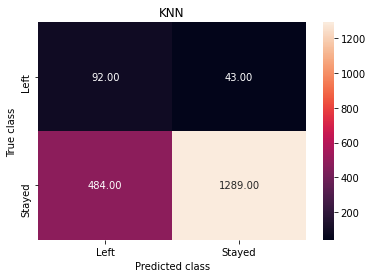

In [ ]:
#Confusion Matrix for Logistic Regression
y_pred = model.predict(x_test)
model_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(model_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNN')
plt.savefig('KNN')

In [ ]:
92/576

0.1597222222222222

In [ ]:
#Precison Recall Scores for SVM
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1332
           1       0.00      0.00      0.00       576

    accuracy                           0.70      1908
   macro avg       0.35      0.50      0.41      1908
weighted avg       0.49      0.70      0.57      1908



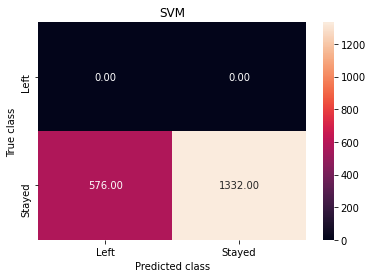

In [ ]:
#Confusion Matrix for Logistic Regression
y_pred = svc.predict(x_test)
svm_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(svm_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVM')
plt.savefig('SVM')

From all of the turnover cases, random forest correctly retrieved 398 out of 576. This translates to a turnover "recall" and "precision of about 69% (398/576), which is  better than KNN (33.6%), logistic regression (15.9%) and support vector machines (0%)

# ROC Curve

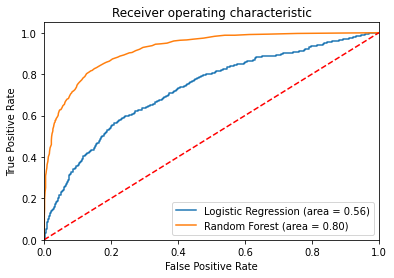

In [ ]:
#ROC for logistic regression
log_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_LR_RF')
plt.show()

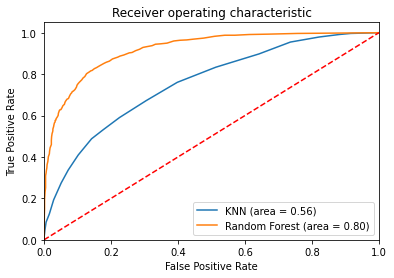

In [ ]:
#ROC for logistic regression
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % log_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_KNN_RF')
plt.show()

From the above ROC plots:the dotted line represents the ROC curve of a purely random classifier;  the model is definitely better than the no information reference point because it curves substantially above the diagonal line

So my observation: 
- Random forest is fair to pridict employees turnover.



# Next is to determine Variable Imporatnce for Random Forest Classifier

In [ ]:
feature=np.array(columns)
analysis_result=[]
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature[index], (importance[index] *100.0)))
    analysis_result += ('{}-{:.2f}%'.format(feature[index], (importance[index] *100.0)))

promoted-0.37%
bonus-1.27%
salary-1.96%
projects-2.01%
dep_code-4.88%
tenure-7.33%
review-25.76%
avg_hrs_month-26.83%
satisfaction-29.58%


We can see that random forest classifier predicts the most important factors. Here in descending order:

    - satisfaction
    - avg_hrs_month
    - review
    - department
    - projects
    - salary
    - bonus
    - promoted




# Conclusion and recommendation

- We can see that 29% of employees are left. 
- IT, Logistics,retail departments are the top three having highest turnover in ascending order and Finance department has lowest turnover rate. 
- Random forest classifier is best predictive model.

Based on my analysis I would recommend the following:
- Campany should assess its employees satisfaction and do some measure.
- Promotion length should be less than 24 months.
- Do not take seriously employees composite evaluation score to promot them or to allow them to participate in projects.
- Give appropriate bonus for all employees.